# Credit Card Fraud Detection

In [ ]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# formatting
import warnings
warnings.filterwarnings("ignore")

In [3]:
# check out the data
txns = pd.read_csv('../data/creditcard.csv')
txns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Data Overview

* super unbalaned - `0.17:99.83` (fraud to non-fraud)
* V1-V28 are results of PCA (Principal Component Analysis), hence 0 domain knowledge
* Time is time elapsed btw ith txn and 1st txn

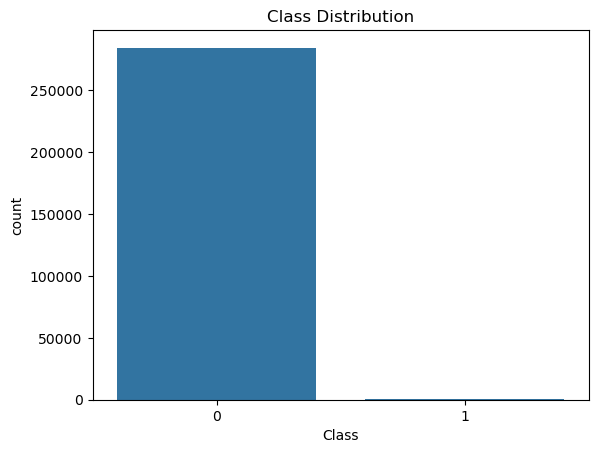

In [4]:
# plot the class distribution
sns.countplot(x='Class', data=txns)
plt.title('Class Distribution')
plt.show()

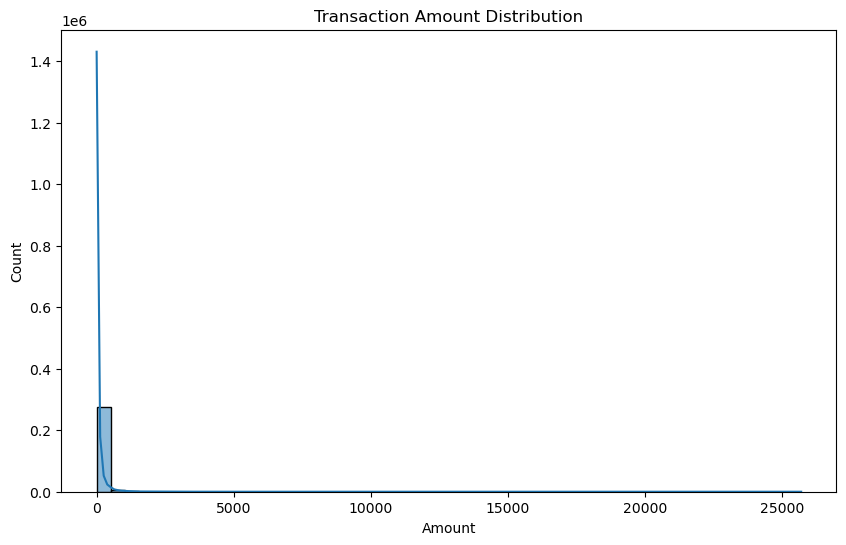

In [ ]:
# plot the distribution of Amount 
plt.figure(figsize=(10, 6))
sns.histplot(txns['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

##### majorly cheap values of amount

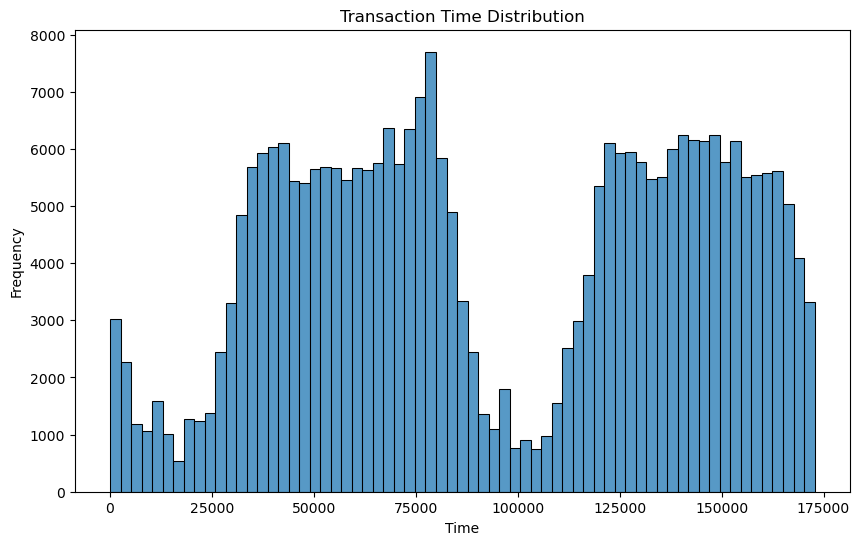

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(txns['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

## Feature Engineering

only two features are somewhat meaningful. `time` and `amount`.

* `anount`: take log of amount as it's super skewed, should fix the range.
* `time`: convert to hours of the day -> monring, evening, night

### Amount

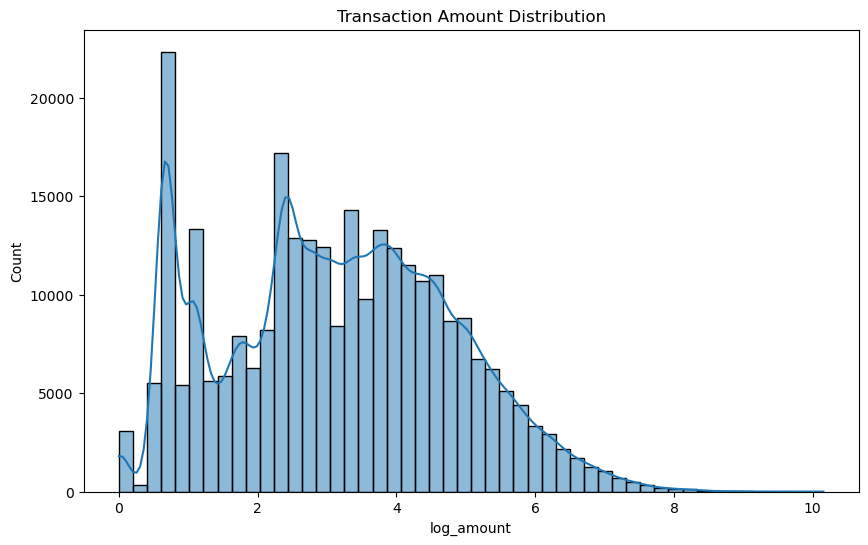

In [21]:
# transform amount and plot it
txns['log_amount'] = np.log1p(txns['Amount'])
plt.figure(figsize=(10, 6))
sns.histplot(txns['log_amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

#### distribution looks a bit better now

In [ ]:
# drop original amount column
txns = txns.drop(columns=['Amount'])

In [25]:
txns

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,log_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,0.570980
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,3.249987
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,4.232366
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,2.397895


### Time

In [29]:
txns['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

In [32]:
# convert seconds elapsed to hour of the day
txns['hour_of_day'] = (txns['Time'] // 3600) % 24
txns['hour_of_day'] = txns['hour_of_day'].astype(int)

# convert time to morning/noon/evening/night and label encode
txns['time_of_day'] = pd.cut(txns['hour_of_day'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Noon', 'Evening'], right=False)
txns['time_of_day'] = txns['time_of_day'].map({'Morning': 0, 'Noon': 1, 'Evening': 2, 'Night': 3 })

In [34]:
# drop original time column
txns = txns.drop(columns=['Time'])
txns.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,log_amount,hour_of_day,time_of_day
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760,0,3
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626,0,3
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276,0,3
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306,0,3
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539,0,3


### Baseline logreg model

In [41]:
# split the data into training and testing sets
X = txns.drop(columns=['Class'])
y = txns['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(227845, 31) (227845,)
(56962, 31) (56962,)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# Train Logistic Regression baseline
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [45]:
# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Metrics
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("PR AUC:", average_precision_score(y_test, y_prob))  # good for imbalance
print(classification_report(y_test, y_pred, digits=4))

ROC AUC: 0.9709176316137036
PR AUC: 0.7099935981056662
              precision    recall  f1-score   support

           0     0.9999    0.9736    0.9865     56864
           1     0.0565    0.9184    0.1064        98

    accuracy                         0.9735     56962
   macro avg     0.5282    0.9460    0.5465     56962
weighted avg     0.9982    0.9735    0.9850     56962



### Observations

* low precision = spams `fraud` predictions most of the time 
* high recall = catches almost all `fraud` cases.

not a super bad tradeoff, as even if a non-fraud case is flagged as fraud (false-alarm), it can be looked into and debunked without causing much harm.

### Baseline xgboost

In [ ]:
# import stratified train test split, gridcv search and cross val score
from xgboost import XGBClassifier

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Scale Pos Weight: {scale_pos_weight:.2f}")

xgb_clf = XGBClassifier(
    eval_metric=['aucpr', 'auc'],
    use_label_encoder=False,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight  # handle class imbalance
)

Scale Pos Weight: 577.29


In [ ]:
# convert categorical to numerical for xgboost
X_train['time_of_day'] = X_train['time_of_day'].astype(int)
X_test['time_of_day'] = X_test['time_of_day'].astype(int)

In [56]:
# fit and evaluate 
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
y_prob = xgb_clf.predict_proba(X_test)[:, 1]

# Metrics
print("XGBoost Metrics: ")
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("PR AUC:", average_precision_score(y_test, y_prob))
print(classification_report(y_test, y_pred, digits=4))

XGBoost Metrics: 
ROC AUC: 0.9726262374674124
PR AUC: 0.8776027532837254
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8804    0.8265    0.8526        98

    accuracy                         0.9995     56962
   macro avg     0.9401    0.9132    0.9262     56962
weighted avg     0.9995    0.9995    0.9995     56962



### Observations

* way better precision and recall. xgboost does a really good job here

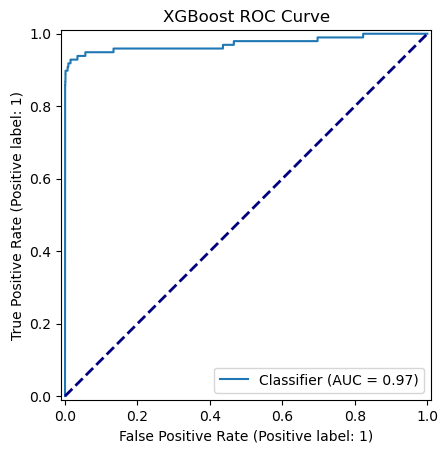

In [59]:
# plot roc curve
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title('XGBoost ROC Curve')
plt.show()

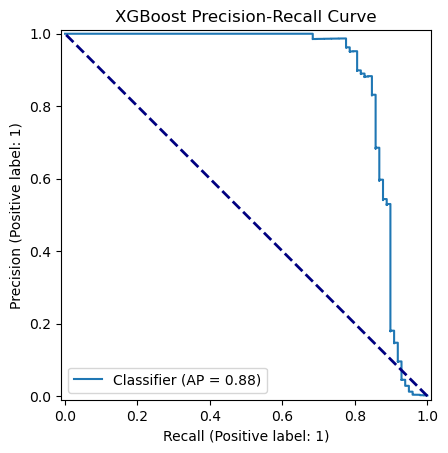

In [66]:
# pr-auc curve
PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.plot([1, 0], [0, 1], color="navy", lw=2, linestyle="--")
plt.title('XGBoost Precision-Recall Curve')
plt.show()

### Hyperparams Tuning

In [67]:
# use stratified kfold and randomized search cv to tune hyperparameters
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

xgb = XGBClassifier(
    eval_metric="aucpr",   # directly optimize PR-AUC
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

In [ ]:
# parameter grid for xgboost
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
}

# Stratified CV for imbalance
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [72]:
# Random search optimizing for PR-AUC
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=15,
    scoring="average_precision",   # PR-AUC (better for imbalance)
    cv=cv,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Best PR-AUC:", search.best_score_)

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:18:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:18:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:18:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:18:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Best params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 1.0}
Best PR-AUC: 0.84726034951252


Exception ignored in: <function ResourceTracker.__del__ at 0x104389bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106fb1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106a75bc0>
Traceback (most recent call last

In [73]:
# compare best model to baseline
best_xgb = search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

print("Tuned XGBoost Metrics: ")
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("PR AUC:", average_precision_score(y_test, y_prob))
print(classification_report(y_test, y_pred, digits=4))

Tuned XGBoost Metrics: 
ROC AUC: 0.9797429312186327
PR AUC: 0.8804197743346124
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8710    0.8265    0.8482        98

    accuracy                         0.9995     56962
   macro avg     0.9353    0.9132    0.9240     56962
weighted avg     0.9995    0.9995    0.9995     56962



## Save Model for Inference

In [74]:
import joblib

joblib.dump(best_xgb, '../models/best_xgb_model.pkl')

['../models/best_xgb_model.pkl']